In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge 

from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("C:\\Users\\saleh\\OneDrive\\Desktop\\housePrice.csv")
df

,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area
0,1,True,True,True,Shahran,1850000000,61666.67,63
1,1,True,True,True,Shahran,1850000000,61666.67,60
2,2,True,True,True,Pardis,550000000,18333.33,79
3,2,True,True,True,Shahrake Qods,902500000,30083.33,95
4,2,True,True,True,Shahrake Gharb,7000000000,233333.33,123
...,...,...,...,...,...,...,...,...
3469,2,True,True,True,Southern Janatabad,3500000000,116666.67,86
3470,2,True,True,True,Niavaran,6800000000,226666.67,83
3471,2,False,False,False,Parand,365000000,12166.67,75
3472,2,True,True,True,Dorous,5600000000,186666.67,105


### Pre Processing

In [3]:
#checking null
#for each column

a=df.loc[df['Area'].isna()==True]['Area']
print(a)
r=df.loc[df['Room'].isna()==True]['Room']
print(r)
p=df.loc[df['Parking'].isna()==True]['Parking']
print(p)
w=df.loc[df['Warehouse'].isna()==True]['Warehouse']
print(w)
e=df.loc[df['Elevator'].isna()==True]['Elevator']
print(e)
ad=df.loc[df['Address'].isna()==True]['Address']
print(ad)
pr=df.loc[df['Price'].isna()==True]['Price']
print(pr)
pru=df.loc[df['Price(USD)'].isna()==True]['Price(USD)']
print(pru)

Series([], Name: Area, dtype: int64)
Series([], Name: Room, dtype: int64)
Series([], Name: Parking, dtype: bool)
Series([], Name: Warehouse, dtype: bool)
Series([], Name: Elevator, dtype: bool)
43      NaN
661     NaN
705     NaN
1106    NaN
1107    NaN
1575    NaN
1792    NaN
2067    NaN
2068    NaN
2123    NaN
2239    NaN
2333    NaN
2422    NaN
2724    NaN
3020    NaN
3171    NaN
3257    NaN
3290    NaN
3310    NaN
3313    NaN
3350    NaN
3396    NaN
3429    NaN
Name: Address, dtype: object
Series([], Name: Price, dtype: int64)
Series([], Name: Price(USD), dtype: float64)


In [4]:
#not possible to know the address so we remove those null rows from 
df = df.loc[df['Address'].isna()!=True]
df

,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area
0,1,True,True,True,Shahran,1850000000,61666.67,63
1,1,True,True,True,Shahran,1850000000,61666.67,60
2,2,True,True,True,Pardis,550000000,18333.33,79
3,2,True,True,True,Shahrake Qods,902500000,30083.33,95
4,2,True,True,True,Shahrake Gharb,7000000000,233333.33,123
...,...,...,...,...,...,...,...,...
3469,2,True,True,True,Southern Janatabad,3500000000,116666.67,86
3470,2,True,True,True,Niavaran,6800000000,226666.67,83
3471,2,False,False,False,Parand,365000000,12166.67,75
3472,2,True,True,True,Dorous,5600000000,186666.67,105


In [5]:
#dropping columns
df=df.drop(['Price'],axis=1)
# we dont meed the price column as price(usd) is just converted of price column hence redundant row


In [6]:
#finding duplictate rows
duplicate = df[df.duplicated()]
print(duplicate)


      Room  Parking  Warehouse  Elevator            Address  Price(USD)  Area
55       1     True       True     False              Punak    67666.67    61
78       2     True       True      True            Amirieh    56666.67    74
79       3    False      False      True             Parand    18666.67    88
80       1     True       True      True              Punak    71666.67    63
81       3     True       True      True         Sattarkhan   183333.33   114
...    ...      ...        ...       ...                ...         ...   ...
3444     2     True       True      True              Punak   125333.33    80
3446     2     True       True      True  Central Janatabad   133333.33    88
3454     2     True       True      True        Ostad Moein    75000.00    80
3456     1     True       True      True              Punak    76666.67    55
3471     2    False      False     False             Parand    12166.67    75

[208 rows x 7 columns]


In [7]:
#removing duplicate
df=df.drop_duplicates()


In [8]:
#encoding
lb=LabelEncoder()
df['Parking']=lb.fit_transform(df['Parking'])
df['Warehouse']=lb.fit_transform(df['Warehouse'])
df['Elevator']=lb.fit_transform(df['Elevator'])
df['Address_encoded']=lb.fit_transform(df['Address'])


### ML 

#### choosing important features

In [9]:
df.corr()
#we can see that all the columns dont have similarities most have correlation close to zero so we are needing all the features

,Room,Parking,Warehouse,Elevator,Price(USD),Area,Address_encoded
Room,1.000000,0.278591,0.125803,0.181782,0.569759,0.498366,-0.067246
Parking,0.278591,1.000000,0.430523,0.429030,0.193164,0.123876,0.021673
Warehouse,0.125803,0.430523,1.000000,0.206231,0.108627,0.017844,0.016482
Elevator,0.181782,0.429030,0.206231,1.000000,0.109665,0.007836,0.078444
Price(USD),0.569759,0.193164,0.108627,0.109665,1.000000,0.544237,-0.069747
Area,0.498366,0.123876,0.017844,0.007836,0.544237,1.000000,-0.084247
Address_encoded,-0.067246,0.021673,0.016482,0.078444,-0.069747,-0.084247,1.000000


In [10]:
#we dont need address as it works with numeric data
df=df.drop('Address',axis=1)

In [12]:
x=df.drop('Price(USD)',axis=1)
y=df['Price(USD)']

### using models and generating data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
ridge_model_data=x_test


In [14]:
#USING RIDGE MODEL
model2=Ridge()

model2.fit(x_train,y_train)


t_score=model2.score(x_train,y_train)
test_score=model2.score(x_test,y_test)


y_prediction = model2.predict(x_test)


ridge_model_data['Price(USD)']=y_prediction


r_mse=mean_squared_error(y_test,y_prediction)#mean square error
r_rmse=np.sqrt(r_mse)#root mean square error



print('The R2 score for training dataset is', model2.score(x_train,y_train))
print('The R2 score for testing dataset is', test_score)

print('The mean square error is', r_mse)
print('The root mean square error is',r_rmse)


The R2 score for training dataset is 0.40107979410696104
The R2 score for testing dataset is 0.47679563063216013
The mean square error is 40900628848.86949
The root mean square error is 202239.03888435956


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
decision_tree_model_data=x_test


In [16]:
model5=DecisionTreeRegressor()

model5.fit(x_train,y_train)


t_score=model5.score(x_train,y_train)
test_score=model5.score(x_test,y_test)



y_prediction = model5.predict(x_test)


decision_tree_model_data['Price(USD)']=y_prediction

d_mse=mean_squared_error(y_test,y_prediction)#mean square error
d_rmse=np.sqrt(d_mse)#root mean square error

print('The R2 score for training dataset is',t_score)
print('The R2 score for testing dataset is', test_score)

print('The mean square error is', d_mse)
print('The root mean square error is',d_rmse)

The R2 score for training dataset is 0.9921915496198959
The R2 score for testing dataset is 0.5063252690537847
The mean square error is 38592198621.913475
The root mean square error is 196448.97205613847


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
random_forest_model_data=x_test


In [18]:

model6=RandomForestRegressor()
model6.fit(x_train,y_train)


t_score=model6.score(x_train,y_train)
test_score=model6.score(x_test,y_test)


y_prediction = model6.predict(x_test)


random_forest_model_data['Price(USD)']=y_prediction


rf_mse=mean_squared_error(y_test,y_prediction)#mean square error
rf_rmse=np.sqrt(rf_mse)#root mean square error


print('The R2 score for training dataset is', t_score)
print('The R2 score for testing dataset is', test_score)

print('The mean square error is', rf_mse)
print('The root mean square error is',rf_rmse)

The R2 score for training dataset is 0.9468857271851243
The R2 score for testing dataset is 0.7491078442108139
The mean square error is 19613075780.358734
The root mean square error is 140046.69142953266


In [19]:
#which model is better

#the one which has a high R2 score with arounf 0.75 for the training set and 0.94 for the testing dataset is better
#the one which has a low mean square of 

#if we use tree related ML we get better results as described by the metrics


### Data Visualization

 ### we make class distribution of all three data predicted by the three models used and it shows that the data predicted by RadomForestRegressor showed better results

In [20]:
#categorical data is used to show the which range the prices fall in to display clear results

df["Price(USD)"].describe()

count    3.243000e+03
mean     1.824515e+05
std      2.757015e+05
min      1.200000e+02
25%      4.733333e+04
50%      9.900000e+04
75%      2.055833e+05
max      3.080000e+06
Name: Price(USD), dtype: float64

In [36]:
#categorical data is used to show the which range the prices fall in to display clear results

q1=df["Price(USD)"].describe()[4]
q2=df["Price(USD)"].describe()[5]
q3=df["Price(USD)"].describe()[6]


47333.33

In [23]:
#class distribution 
price_cat=[]
for p in ridge_model_data['Price(USD)']:
    if p<=q1:
        price_cat.append('Cheap')
    elif p>q1 and p<=q2:
        price_cat.append('Below Average')
    elif p>q2 and p<=q3:
        price_cat.append('Above Average')
    elif p>q3:
        price_cat.append('Expensive')
ridge_model_data['Price Type']=price_cat        


price_cat=[]
for p in decision_tree_model_data['Price(USD)']:
    if p<=q1:
        price_cat.append('Cheap')
    elif p>q1 and p<=q2:
        price_cat.append('Below Average')
    elif p>q2 and p<=q3:
        price_cat.append('Above Average')
    elif p>q3:
        price_cat.append('Expensive')
decision_tree_model_data['Price Type']=price_cat        
decision_tree_model_data



price_cat=[]
for p in random_forest_model_data['Price(USD)']:
    if p<=q1:
        price_cat.append('Cheap')
    elif p>q1 and p<=q2:
        price_cat.append('Below Average')
    elif p>q2 and p<=q3:
        price_cat.append('Above Average')
    elif p>q3:
        price_cat.append('Expensive')
random_forest_model_data['Price Type']=price_cat        
random_forest_model_data


,Room,Parking,Warehouse,Elevator,Area,Address_encoded,Price(USD),Price Type
2384,2,1,1,1,120,43,2.712644e+05,Expensive
844,2,0,1,1,51,84,3.225833e+04,Cheap
3063,1,1,1,0,35,125,2.995555e+04,Cheap
1683,2,1,1,1,120,0,1.701391e+05,Above Average
69,1,1,1,0,53,40,5.858000e+04,Below Average
...,...,...,...,...,...,...,...,...
2912,1,1,1,1,40,41,4.393333e+04,Cheap
884,2,1,0,0,78,71,3.736000e+04,Cheap
2058,2,1,1,1,100,135,1.918380e+05,Above Average
1704,3,1,1,1,124,163,2.228242e+05,Expensive


Text(0.5, 1.0, 'Ridge model ')

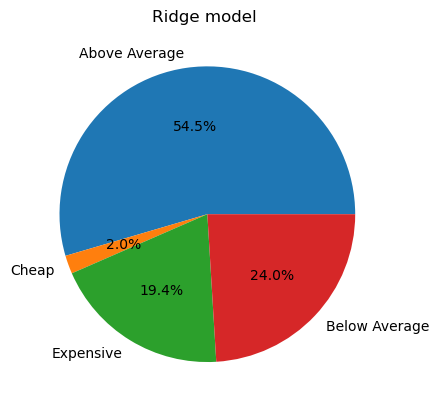

In [33]:
#pie chart

plt.pie(ridge_model_data.groupby('Price Type')['Price Type'].count(),autopct='%1.1f%%',labels=ridge_model_data['Price Type'].unique())
plt.title('Ridge model ')

Text(0.5, 1.0, 'Decision Tree model ')

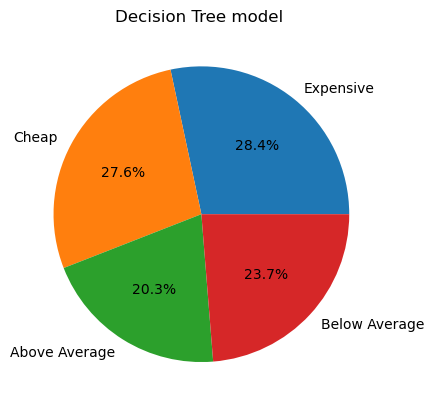

In [35]:
plt.pie(random_forest_model_data.groupby('Price Type')['Price Type'].count(),autopct='%1.1f%%',labels=decision_tree_model_data['Price Type'].unique())
plt.title('Decision Tree model ')

Text(0.5, 1.0, 'Random Forest Regressor')

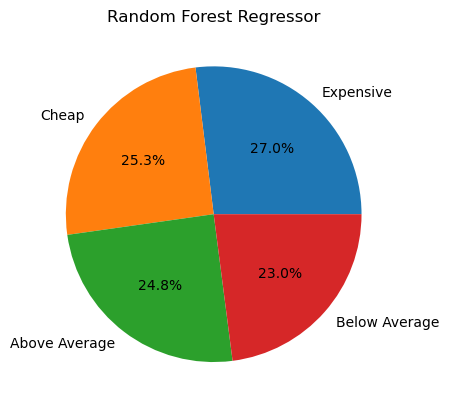

In [37]:
plt.pie(decision_tree_model_data.groupby('Price Type')['Price Type'].count(),labels=random_forest_model_data['Price Type'].unique(),autopct='%1.1f%%')
plt.title('Random Forest Regressor')

In [ ]:
#we got a result of equal class distribution to 25% in each class of data

Text(0, 0.5, 'Price(USD)')

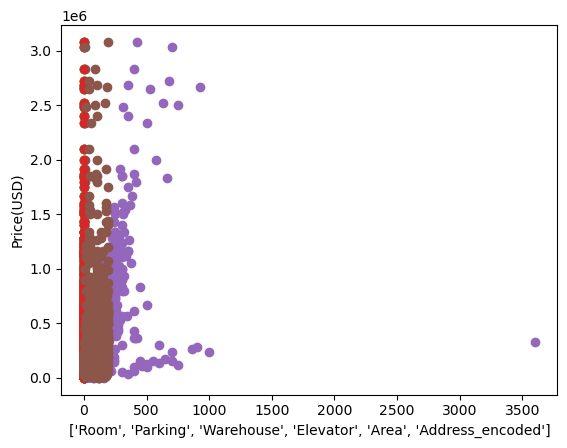

In [27]:
%matplotlib inline
x=df.drop(['Price(USD)'],axis=1)
y=df['Price(USD)']


for c in x.columns:
    plt.scatter(x[c],y)

x_col=[c for c in x.columns]    
    
plt.xlabel(x_col)
plt.ylabel('Price(USD)')


In [29]:
df.corr()

,Room,Parking,Warehouse,Elevator,Price(USD),Area,Address_encoded
Room,1.000000,0.278591,0.125803,0.181782,0.569759,0.498366,-0.067246
Parking,0.278591,1.000000,0.430523,0.429030,0.193164,0.123876,0.021673
Warehouse,0.125803,0.430523,1.000000,0.206231,0.108627,0.017844,0.016482
Elevator,0.181782,0.429030,0.206231,1.000000,0.109665,0.007836,0.078444
Price(USD),0.569759,0.193164,0.108627,0.109665,1.000000,0.544237,-0.069747
Area,0.498366,0.123876,0.017844,0.007836,0.544237,1.000000,-0.084247
Address_encoded,-0.067246,0.021673,0.016482,0.078444,-0.069747,-0.084247,1.000000
